In [133]:
import numpy as np
from math import floor
import pandas as pd
import torch
import torchvision
from torch.utils.data import Subset
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import PIL.Image as Image
import seaborn as sns


# import the data and plot the first image

In [123]:
df_train=pd.read_csv("/Users/xiaokeai/Downloads/Facial-Keypoints-Detection-master/Data/training.csv")
df_train.head(1)
len(df_train)

7049

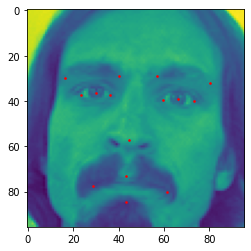

In [124]:
def PlotImage(n):
    pil_im = np.asarray(df_train.iloc[n,30].split(" ")).reshape(96,96).astype(np.uint8)
    type(pil_im)
    a=Image.fromarray(pil_im)
    landmarks=df_train.iloc[n,0:-1]
    landmarks = np.asarray(landmarks)
    landmarks = landmarks.astype('float').reshape(-1, 2)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.imshow(a)
PlotImage(0)

# feature engineering

In [136]:
#feature engineering functions
def df_shape(df):
    return df.shape[0],df.shape[1]
def df_is_null(df):
    is_null_list=[]
    for i in range(0,len(df.columns)):
        a=float(df.isna().sum()[i])
        is_null_list.append((df.columns[i],'{percent:.2%}'.format(percent=a/float(len(df)))))
    return is_null_list
def drop_null_any(df):
    df=df.dropna(axis=0, how='any', inplace=False)
    return df
def corr_heatmap(df):
    sns.heatmap(df.corr(), 
            xticklabels=df.columns.values,
            yticklabels=df.columns.values,cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [126]:
df_shape(df_train)

(7049, 31)

In [127]:
df_is_null(df_train)

[('left_eye_center_x', '0.14%'),
 ('left_eye_center_y', '0.14%'),
 ('right_eye_center_x', '0.18%'),
 ('right_eye_center_y', '0.18%'),
 ('left_eye_inner_corner_x', '67.78%'),
 ('left_eye_inner_corner_y', '67.78%'),
 ('left_eye_outer_corner_x', '67.84%'),
 ('left_eye_outer_corner_y', '67.84%'),
 ('right_eye_inner_corner_x', '67.83%'),
 ('right_eye_inner_corner_y', '67.83%'),
 ('right_eye_outer_corner_x', '67.83%'),
 ('right_eye_outer_corner_y', '67.83%'),
 ('left_eyebrow_inner_end_x', '67.80%'),
 ('left_eyebrow_inner_end_y', '67.80%'),
 ('left_eyebrow_outer_end_x', '68.44%'),
 ('left_eyebrow_outer_end_y', '68.44%'),
 ('right_eyebrow_inner_end_x', '67.80%'),
 ('right_eyebrow_inner_end_y', '67.80%'),
 ('right_eyebrow_outer_end_x', '68.28%'),
 ('right_eyebrow_outer_end_y', '68.28%'),
 ('nose_tip_x', '0.00%'),
 ('nose_tip_y', '0.00%'),
 ('mouth_left_corner_x', '67.81%'),
 ('mouth_left_corner_y', '67.81%'),
 ('mouth_right_corner_x', '67.80%'),
 ('mouth_right_corner_y', '67.80%'),
 ('mouth_cen

In [130]:
df=drop_null_any(df_train)
df_shape(df)

(2140, 31)

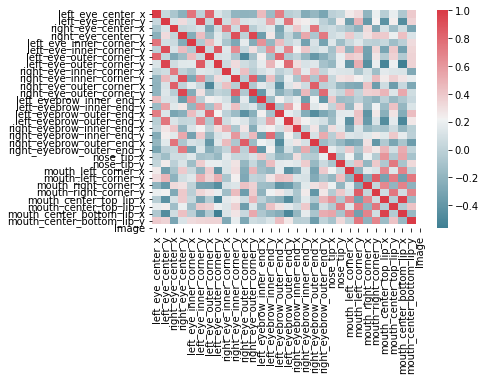

In [137]:
corr_heatmap(df)

# image augumentation

# split the cleaned dataset